# Sklearn

## sklearn.tree

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

примеры: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets, tree
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [4]:
 classification_problem = datasets.make_classification(n_features=2, 
                                                      n_informative = 2, 
                                                      n_classes = 3, n_redundant = 0,
                                                      n_clusters_per_class = 1,
                                                      random_state = 3)

In [5]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

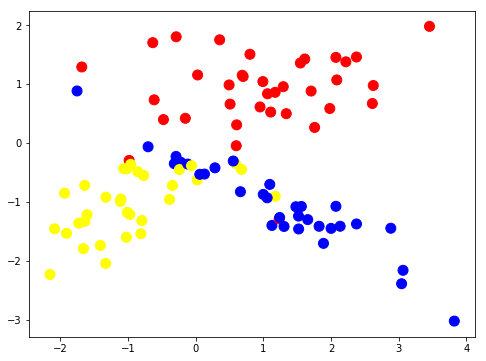

In [7]:
pylab.figure(figsize = (8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), 
              list(map(lambda x: x[1], classification_problem[0])), 
             c = classification_problem[1], cmap = colors, s = 100)

In [9]:
train_data, test_data, train_labels, test_labels = train_test_split(classification_problem[0], 
                                                                   classification_problem[1], 
                                                                   test_size = 0.3,
                                                                   random_state = 1)

Модель DesicionTreeClassifier

In [10]:
clf = tree.DecisionTreeClassifier(random_state = 1)
clf.fit(train_data, train_labels)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [12]:
prediction = clf.predict(test_data)
metrics.accuracy_score(test_labels, prediction)

0.7666666666666667

Разделяющая поверхность

In [13]:
def get_meshgrid(data, step = .05, border = .5):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 0].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [27]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels,
                         colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16,6))
    
    #plot desicion surface on the train data
    pyplot.subplot(1,2,1)
    xx,yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))

    #plot desicion surface on the test data 
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:,0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))
    
    
    
    

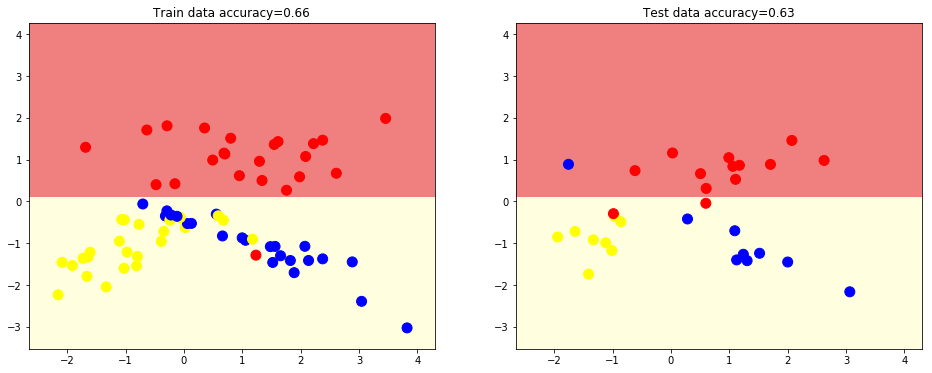

In [23]:
estimator = tree.DecisionTreeClassifier(random_state=1, max_depth=1)

plot_decision_surface(estimator,train_data, train_labels, test_data, test_labels)

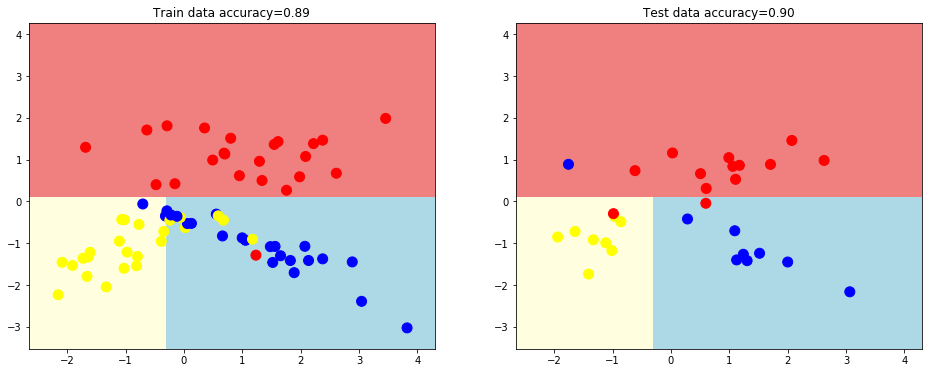

In [24]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                     train_data, train_labels, test_data, test_labels)

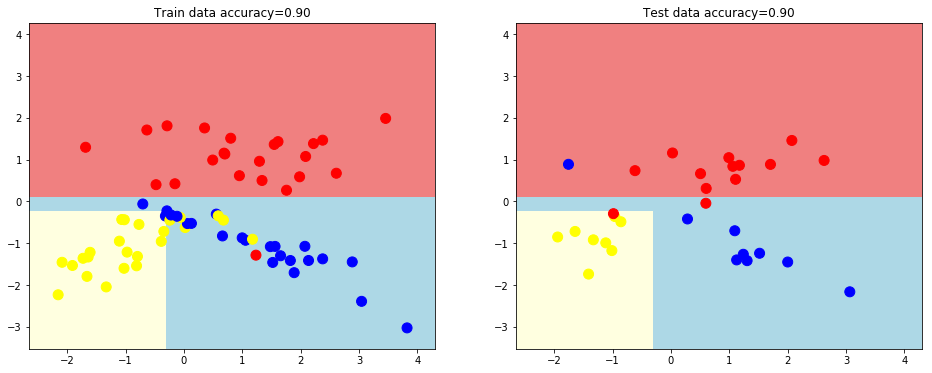

In [29]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, max_depth  =3),
                     train_data, train_labels, test_data, test_labels)

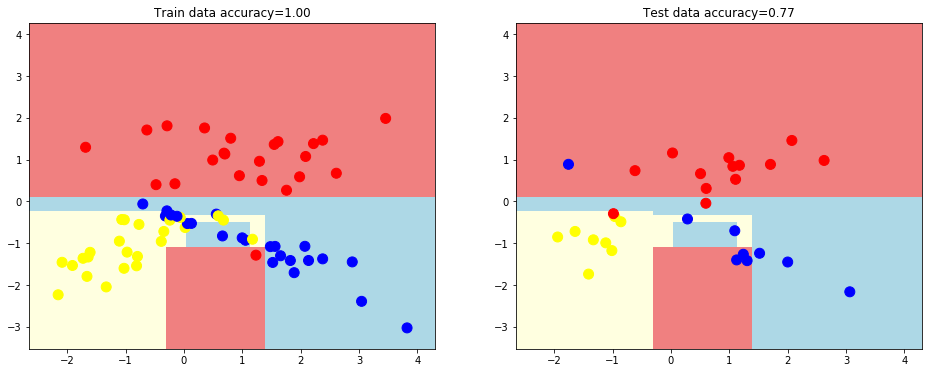

In [31]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1),
                     train_data, train_labels, test_data, test_labels)

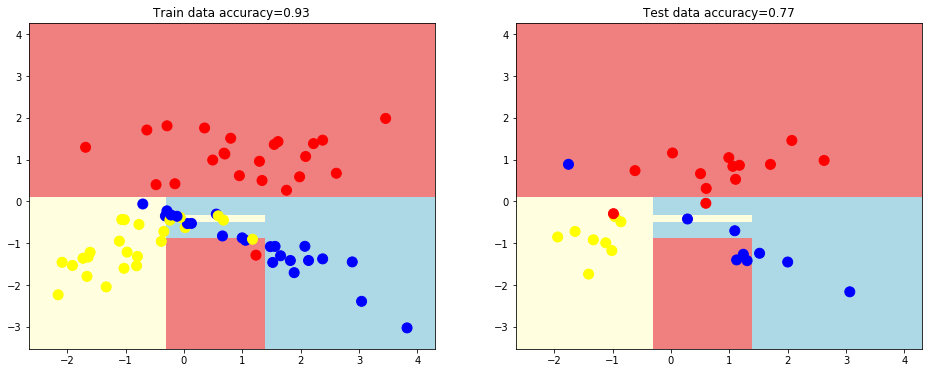

In [33]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=3),
                     train_data, train_labels, test_data, test_labels)